|First Name     |Last Name    |MtkNr.      |Due Date  | 
|:-------------:|:-----------:|:----------:|:--------:|
| Giovanni    | Filomeno  |K12315325     | 20.01.2025, 16:00

<h1 style="color:rgb(150,100,10)">Computer Vision Course</h1>
<h2 style="color:rgb(150,100,10)">Assignment 4 – 3D Reconstruction </h2>>

<b>Authors:</b> O. Bimber, M. Abbass<br>
<b>Date:</b> 30-10-2024

<b>This file is part of the "Computer Vision Course 2024W" UE material.</b>

<h2 style="color:rgb(150,100,10)">Table of Contents</h2>
<ol>
    <a style="color:rgb(150,100,10)" href="#Head-topic-1"><li style="font-size:large;font-weight:bold">Structure-from-Motion (SfM)</li></a>
    <ol style="margin-bottom:15px">
        <a style="color:rgb(150,100,10)" href="#Sub-Head-topic-1-1"><li style="font-size:medium">Scene Reconstruction with COLMAP</li></a>
        <a style="color:rgb(150,100,10)" href="#Sub-Head-topic-1-2"><li style="font-size:medium">Analysis of Reconstruction Results</li></a>
</ol>
<a style="color:rgb(150,100,10)" href="#Head-topic-2"><li style="font-size:large;font-weight:bold">Light Fields</li></a>
    <ol style="margin-bottom:10px">
        <a style="color:rgb(150,100,10)" href="#Sub-Head-topic-2-1"><li style="font-size:medium">Experiment 1</li></a>
        <a style="color:rgb(150,100,10)" href="#Sub-Head-topic-2-2"><li style="font-size:medium">Experiment 2</li></a>
</ol>
    <a style="color:rgb(150,100,10)" href="#Head-topic-3"><li style="font-size:large;font-weight:bold">Neural Radiance Fields</li></a>
    <ol style="margin-bottom:10px">
        <a style="color:rgb(150,100,10)" href="#Sub-Head-topic-3-1"><li style="font-size:medium">Experiment 1</li></a>
        <a style="color:rgb(150,100,10)" href="#Sub-Head-topic-3-2"><li style="font-size:medium">Experiment 2</li></a>
</ol>
    
</ol>

<h1 style="color:rgb(255,0,0)">Important Note</h1>

<b>All cells must be evaluated, and any unevaluated cell may lead to a loss of points, regardless of the correctness of the code.</b>

In [1]:
from matplotlib import pyplot as plt
import os
import cv2
if not os.path.exists('resources'): raise TypeError("Please create the resources folder")

<a name="Head-topic-1"></a><h2>Structure-from-Motion (SfM)</h2>
    
The main goal is to utilize COLMAP for scene reconstruction. 

You need to download <i><b>COLMAP version 3.8</b></i> from [this link](https://github.com/colmap/colmap/releases). After downloading, you can use <i><b>COLMAP.bat</b></i> to start the program.

Additionally, download the <i><b>south-building</b></i> dataset from [this link](https://demuc.de/colmap/datasets/).

<a name="Sub-Head-topic-1-1"></a><h3>Scene Reconstruction with COLMAP</h3>

<b>Exercise 1.1. [20 Points]</b>
   
<b>Goal:</b> The aim is to reconstruct a 3D model from the <i><b>south-building</b></i> dataset using the default parameters of COLMAP.

<b>Task</b>
<ul>

<li>Use the <i><b>128 images</b></i> provided and apply the default parameters of COLMAP.</li>
<li>Capture snapshots of the reconstructed scene from <i><b>three different perspectives</b></i> (e.g., front view, side view, and top view).</li>
</ul>

<b>Hint</b>
<ul> 
<li>You must save the snapshot in the <i><b>resources folder</b></i> with <b><i>.jpg</b></i> extension, then run the <i><b>draw_snapshots</b></i> function below to show the images.</li>
<li><span style="color:rgb(220,10,10)">Name your snapshots as follows: image_1,  image_2, and image_3.</span></li>
<li><span style="color:rgb(220,10,10)">The reconstruction process may take some time.</span></li>
</ul>


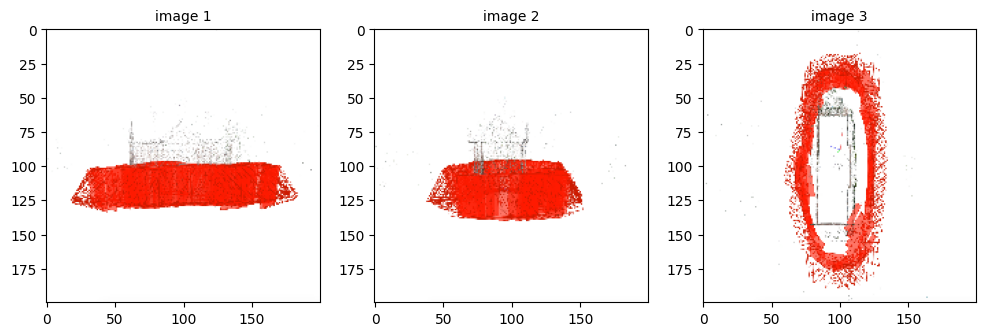

In [4]:
# After saving all snapshots, run this cell to show the snapshots

def draw_snapshots(img1 = 'resources/image_1.jpg', img2 = 'resources/image_2.jpg', img3 = 'resources/image_3.jpg'):
    size = (200, 200)
    
    img1 = cv2.cvtColor(cv2.imread(img1),cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(cv2.imread(img2),cv2.COLOR_BGR2RGB)
    img3 = cv2.cvtColor(cv2.imread(img3),cv2.COLOR_BGR2RGB)
    
    img1 = cv2.resize(img1, size )
    img2 = cv2.resize(img2, size )
    img3 = cv2.resize(img3, size )
    
    fig, ax = plt.subplots(1,3, figsize=(12,8))
    ax[0].imshow(img1, cmap='gray')
    ax[0].set_title('image 1', size=10),

    ax[1].imshow(img2, cmap='gray')
    ax[1].set_title('image 2', size=10),

    ax[2].imshow(img3, cmap='gray')
    ax[2].set_title('image 3', size=10),

    plt.show()

draw_snapshots()

<a name="Sub-Head-topic-1-2"></a><h3>Analysis of Reconstruction results</h3>

<b>Exercise 1.2. [30 Points]</b>

<b>Goal:</b> Now, let's analyze the result from <i><b>Exercise 1.1</b><i>. Look at the final values shown on the log screen on the right. Here, you will find a number called <i><b>final cost</b><i>.

<b>Question</b>
<ul>
<li>What does this error mean?</li>
<li>How does COLMAP determine this error?</li>
<li>Would you get the same or a different error if you repeat the experiment, and why?</li>
</ul>

#### Your answer goes here #### 

1) The final cost represents how well the reconstructed 3D model is close to the original 2D image features extracted from the input dataset. It is the average reprojection error of all 3D points projected into a 2D image. A lower values represents a better approximation betwen 3D points and their 2D projection.

2) The error is calculated as a root mean square of the reprojection errors after bundle adjustment. 

3) I run the reconstruction two times and I obtained different values. This can be due to different reasons: 
- Non-convexity: the problem is non convex and it may leed to multiple local minima where the optimization process can get stuck. 
- Randomness: some parameters or initialization steps may include randomness processes.
- Numerical precision: floating-point, machine precision, convergence thresholds/tollerance may lead to different results


<a name="Head-topic-2"></a><h2>Light Fields</h2>

In the second part, we apply a simple light-field viewer. Please find it [here](https://hypothete.github.io/lightfield-webgl2/). Note that we have not talked about this in the lecture, and you need to do some background investigations yourself. Light-fields are related to Neural Radiance Fields (NeRFs), which were discussed in the lecture. You will explore this relationship here.


Light-field rendering is image-based rendering. The pioneering paper is from 1996 (please read this paper, and/or research the internet to understand the principles of light-field rendering):
https://graphics.stanford.edu/papers/light/light-lores.pdf

<a name="Sub-Head-topic-2-1"></a><h3>Experiment 1</h3>

<b>Exercise 2.1. [10 Points]</b>

<b>Goal:</b> Use the light-field viewer to explore how the images change when you change the aperture from narrow to wide<i>.

<b>Question</b>
<ul>
<li>What differences do you observe in the results when the aperture is wide compared to the result when the aperture is narrow?</li>
<li>What differences do you observe in the results when you change the focus?</li>
<li>Why don't you see any focus changes when the aperture is narrow?</li>
</ul>

#### Your answer goes here #### 

1) A wide aperture creates a shallow depth of field with smooth, blurred backgrounds but loses detail in those areas, while a narrow aperture produces a deep depth of field with everything mostly in focus but can suffer from artifacts due to insufficient ray data (black holes appear).

2) Low focus sets the focal plane further away, blurring the LEGO figures and sharpening the background, simulating a distant focal point, while high focus shifts the focal plane closer, sharpening the figures and blurring the background, mimicking a nearby focal point.

3) A narrow aperture creates a large depth of field by collecting a small angular range of nearly parallel light rays, minimizing blur and focus-dependent changes, resulting in a uniformly sharp image where focus adjustments have little to no effect.


<a name="Sub-Head-topic-2-2"></a><h3>Experiment 2</h3>

<b>Exercise 2.2. [15 Points]</b>

<b>Goal:</b> Now set the aperture to full width and change the focus to maximal (front / rear) distances. You observe image artifacts in the out-of-focus regions<i>.

<b>Question</b>
<ul>
<li>Why do these image artifacts appear?</li>
<li>What could you do by re-recording the light field to reduce such artifacts?</li>
<li>What could you do without re-recording the light field to reduce such artifacts?</li>
<li>Do you see a relationship between NeRFS and light-field?</li>
</ul>

#### Your answer goes here #### 

1) Out-of-focus artifacts in light fields arise from sparse sampling, leading to interpolation errors and gaps in ray data, which are magnified by wider apertures.
2) Artifacts can be reduced by re-recording the light field with increased sampling density and angular resolution, along with improved camera calibration.
3) Without re-recording, artifacts can be mitigated through computational methods like denoising, improved interpolation algorithms, super-resolution, and depth-aware rendering.
4) NeRFs and light fields both use ray-based representations, but NeRFs model scenes as continuous volumetric functions learned by neural networks, allowing for better interpolation and flexibility compared to light fields' discrete sampling


<a name="Head-topic-3"></a><h2>Neural Radiance Fields</h2>
Let's now look at NeRFs in the third part of this assignment (you have learned about them in the lecture). Here is an online viewer and several sample scenes: https://nervv.tech/
Explore these scenes with the viewer.

<a name="Sub-Head-topic-3-1"></a><h3>Experiment 1</h3>

<b>Exercise 3.1. [10 Points]</b>

<b>Goal:</b> Investigate the differences between Light Fields and Neural Radiance Fields (NeRFs)<i>.

<b>Question</b>
<ul>
<li>What are the advantages and disadvantages of NeRF over Light Fields. Provide at least one pro and one contra argument for using NeRFs?</li>
</ul>

#### Your answer goes here #### 

- Advantages: NeRFs offer greater data efficiency by synthesizing views from sparse inputs through a continuous volumetric representation, enabling realistic handling of occlusions unlike Light Fields' reliance on dense sampling and pre-captured data.
- Disadvantages: While NeRFs excel in flexibility and scene complexity, they are computationally expensive for training and rendering, limiting real-time applications compared to the faster, pre-captured nature of Light Fields.1 


<a name="Sub-Head-topic-3-2"></a><h3>Experiment 2</h3>

<b>Exercise 3.2. [15 Points]</b>

<b>Goal:</b> Explore NeRF reconstructions.<i>.

<b>Question</b>
<ul>
<li>Why is it possible to observe reconstructed points inside the objects (considering that only their outside surfaces are captured in the input images)? Are these reconstructions any meaningful or correct? </li>
</ul>

<b>Hint</b>
<ul>
<li>The correct answer is not trivial or straightforward!</li>
</ul>

#### Your answer goes here ####

NeRFs, modeling scenes volumetrically as continuous 3D radiance fields without explicit surface definitions, reconstruct points inside objects due to volumetric interpolation and mathematical optimization focused on reproducing 2D images, making these internal points geometrically meaningless but acceptable for rendering purposes, as NeRF prioritizes photorealistic view synthesis over accurate physical geometry.